### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# About data 

#### ➡️ the data was collected from the kaggle  this data contains 2 CSV files one is for train data and the otherone               is for the test data
#### ➡️ The data is used here is cleaned in google sheets before and the advanced cleaning will perform in a model               building 

### Import the train and test data

In [2]:
train_data = pd.read_csv('flightdata.csv')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Air Asia,6/05/2019,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info,3383
1,Air Asia,3/04/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 04 Apr,2h 50m,non-stop,No info,4483
2,Air Asia,12/06/2019,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info,3383
3,Air Asia,3/05/2019,Banglore,Delhi,BLR → DEL,04:55,07:45,2h 50m,non-stop,No info,6181
4,Air Asia,24/04/2019,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info,3383


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
1,Air Asia,6/04/2019,Banglore,Delhi,BLR → DEL,04:55,07:45,2h 50m,non-stop,No info
2,Air Asia,15/04/2019,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info
3,Air Asia,27/06/2019,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info
4,Air Asia,9/06/2019,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info


In [4]:
train_data.shape

(6827, 11)

In [5]:
test_data.shape

(1772, 10)

###  chacking the null values

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## EDA

#### I Performed a Exploratory data analysis in thgis part of the model

### [1]  Picking the journey bay and journey month in both data sets and drop the "Date_of_Journey" column

In [8]:
### creating an function for thr "Journey_data" & "Journey_month" and drop the "Date_of_journey" coloumn

def date(data):
    data['Journey_day'] = pd.to_datetime(data['Date_of_Journey'], format="%d/%m/%Y").dt.day
    data['Journey_month'] = pd.to_datetime(data['Date_of_Journey'], format="%d/%m/%Y").dt.month
    data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [9]:
### put both the data ser

date(train_data)
date(test_data)

In [10]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,Air Asia,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info,3383,6,5
1,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 04 Apr,2h 50m,non-stop,No info,4483,3,4
2,Air Asia,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info,3383,12,6
3,Air Asia,Banglore,Delhi,BLR → DEL,04:55,07:45,2h 50m,non-stop,No info,6181,3,5
4,Air Asia,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info,3383,24,4


In [11]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6
1,Air Asia,Banglore,Delhi,BLR → DEL,04:55,07:45,2h 50m,non-stop,No info,6,4
2,Air Asia,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info,15,4
3,Air Asia,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info,27,6
4,Air Asia,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info,9,6


In [12]:
print(train_data.shape)
print(test_data.shape)

(6827, 12)
(1772, 11)


### [2]  Picking the Dep_hours and Dep_min and drop the "Dep_Time" coloumn

In [13]:
### creating an function for thr "Dep_hour" & "Dep_min" and drop the "Dep_Time" coloumn

def dep_time(data):
    data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
    data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
    data.drop(["Dep_Time"], axis = 1, inplace = True)

In [14]:
dep_time(train_data)
dep_time(test_data)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,Air Asia,Banglore,Delhi,BLR → DEL,13:55,2h 45m,non-stop,No info,3383,6,5,11,10
1,Air Asia,Banglore,Delhi,BLR → DEL,02:45 04 Apr,2h 50m,non-stop,No info,4483,3,4,23,55
2,Air Asia,Banglore,Delhi,BLR → DEL,13:55,2h 45m,non-stop,No info,3383,12,6,11,10
3,Air Asia,Banglore,Delhi,BLR → DEL,07:45,2h 50m,non-stop,No info,6181,3,5,4,55
4,Air Asia,Banglore,Delhi,BLR → DEL,13:55,2h 45m,non-stop,No info,3383,24,4,11,10


In [16]:
print(train_data.shape)
print(test_data.shape)

(6827, 13)
(1772, 12)


### [3]  Picking the Arrival_hours and Arrival_min and drop the "Arrival_Time" coloumn

In [17]:
### creating an function for thr "Arrival_hour" & "Arrival_min" and drop the "Arrival_Time" coloumn

def Arrival_time(data):
    data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
    data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
    data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [18]:
Arrival_time(train_data)
Arrival_time(test_data)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Air Asia,Banglore,Delhi,BLR → DEL,2h 45m,non-stop,No info,3383,6,5,11,10,13,55
1,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,4483,3,4,23,55,2,45
2,Air Asia,Banglore,Delhi,BLR → DEL,2h 45m,non-stop,No info,3383,12,6,11,10,13,55
3,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,6181,3,5,4,55,7,45
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 45m,non-stop,No info,3383,24,4,11,10,13,55


In [20]:
print(train_data.shape)
print(test_data.shape)

(6827, 14)
(1772, 13)


### [4] Picking the hours and minutes from the "Duration" coloumn

In [21]:
### creating an function for the "Duration_hours" & "Duration_mins" and drop the "Duration" coloumn

def duration(data):
    duration = list(data["Duration"])

    for i in range(len(duration)):
        if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
            if "h" in duration[i]:
                duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
            else:
                duration[i] = "0h " + duration[i]           # Adds 0 hour

    duration_hours = []
    duration_mins = []
    for i in range(len(duration)):
        duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
        duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    data["Duration_hours"] = duration_hours
    data["Duration_mins"] = duration_mins 
    
    data.drop(["Duration"], axis = 1, inplace = True)


In [22]:
duration(train_data)
duration(test_data)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,3383,6,5,11,10,13,55,2,45
1,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,4483,3,4,23,55,2,45,2,50
2,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,3383,12,6,11,10,13,55,2,45
3,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6181,3,5,4,55,7,45,2,50
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,3383,24,4,11,10,13,55,2,45


In [24]:
print(train_data.shape)
print(test_data.shape)

(6827, 15)
(1772, 14)


##  Handel the Categorical Data

#### there are 2 ataypes of categoricle data <br>
 #### (1) Nominal data - OneHotEncoder is used in this case
 #### (2) Ordinal data - LabelEncoder is used in this case

      

### [1] Apply the onehotencoding for thye "Airline" coloumn

In [25]:
train_data["Airline"].value_counts()

IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [26]:
train_data["Source"].value_counts()

Delhi       2948
Kolkata     1615
Banglore    1405
Mumbai       478
Chennai      381
Name: Source, dtype: int64

In [27]:
train_data["Destination"].value_counts()

Cochin       2948
Banglore     1615
Delhi         895
New Delhi     510
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

#### [2] compair the total_stops, Airline, Source &, destination with the price and apply the encoding 

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,3383,6,5,11,10,13,55,2,45
1,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,4483,3,4,23,55,2,45,2,50
2,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,3383,12,6,11,10,13,55,2,45
3,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6181,3,5,4,55,7,45,2,50
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,3383,24,4,11,10,13,55,2,45


In [29]:
print("--------Total stops--------")
print(train_data["Total_Stops"].value_counts())
print("--------Airlines----------")
print(train_data["Airline"].value_counts())
print("--------Source--------")
print(train_data["Source"].value_counts())
print("--------Destination--------")
print(train_data["Destination"].value_counts())

--------Total stops--------
1 stop      3086
non-stop    2868
2 stops      827
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64
--------Airlines----------
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
--------Source--------
Delhi       2948
Kolkata     1615
Banglore    1405
Mumbai       478
Chennai      381
Name: Source, dtype: int64
--------Destination--------
Cochin       2948
Banglore     1615
Delhi         895
New Delhi     510
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64


In [30]:
print("--------Airlines----------")
print(test_data["Airline"].value_counts())
print("--------Source--------")
print(test_data["Source"].value_counts())
print("--------Destination--------")
print(test_data["Destination"].value_counts())

--------Airlines----------
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Name: Airline, dtype: int64
--------Source--------
Delhi       800
Kolkata     406
Banglore    355
Mumbai      136
Chennai      75
Name: Source, dtype: int64
--------Destination--------
Cochin       800
Banglore     406
Delhi        226
Hyderabad    136
New Delhi    129
Kolkata       75
Name: Destination, dtype: int64


##### Total_stop VS Price

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

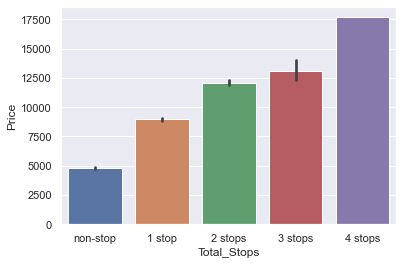

In [31]:
sns.barplot(x="Total_Stops", y="Price", data= train_data)

##### Airlines VS Price

<AxesSubplot:xlabel='Airline', ylabel='Price'>

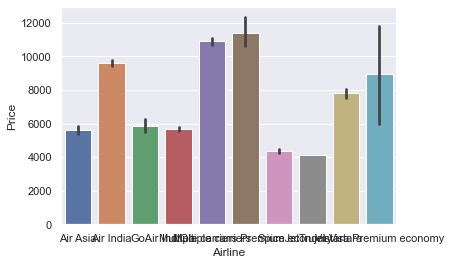

In [32]:
sns.barplot(x="Airline", y="Price", data= train_data)

##### Source VS Price

<AxesSubplot:xlabel='Source', ylabel='Price'>

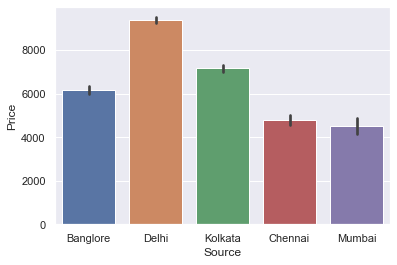

In [33]:
sns.barplot(x="Source", y="Price", data= train_data)

##### Destination VS Price

<AxesSubplot:xlabel='Destination', ylabel='Price'>

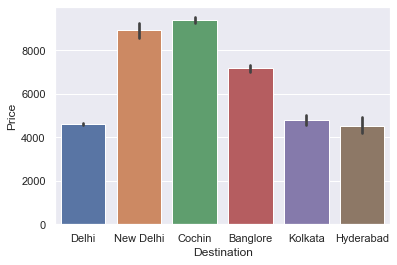

In [34]:
sns.barplot(x="Destination", y="Price", data= train_data)

#### [3]  Apply LabelEncoding  on "Total_Stops" coloumn and drop these three coloumns

In [35]:
def total_stop(data):
    data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [36]:
total_stop(train_data)
total_stop(test_data)

In [37]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,3383,6,5,11,10,13,55,2,45
1,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,4483,3,4,23,55,2,45,2,50
2,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,3383,12,6,11,10,13,55,2,45
3,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,6181,3,5,4,55,7,45,2,50
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,3383,24,4,11,10,13,55,2,45


In [38]:
print(train_data.shape)
print(test_data.shape)

(6827, 15)
(1772, 14)


#### [4] Remove the unnecessary coloumns.

In [39]:
def remove_col(data):
    data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [40]:
remove_col(train_data)
remove_col(test_data)

In [41]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Air Asia,Banglore,Delhi,0,3383,6,5,11,10,13,55,2,45
1,Air Asia,Banglore,Delhi,0,4483,3,4,23,55,2,45,2,50
2,Air Asia,Banglore,Delhi,0,3383,12,6,11,10,13,55,2,45
3,Air Asia,Banglore,Delhi,0,6181,3,5,4,55,7,45,2,50
4,Air Asia,Banglore,Delhi,0,3383,24,4,11,10,13,55,2,45


In [42]:
print(train_data.shape)
print(test_data.shape)

(6827, 13)
(1772, 12)


#### [5] apply the onehotencodingn to all remaining coloumns

In [43]:
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

In [44]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3383,6,5,11,10,13,55,2,45,...,0,0,0,0,0,0,1,0,0,0
1,0,4483,3,4,23,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0
2,0,3383,12,6,11,10,13,55,2,45,...,0,0,0,0,0,0,1,0,0,0
3,0,6181,3,5,4,55,7,45,2,50,...,0,0,0,0,0,0,1,0,0,0
4,0,3383,24,4,11,10,13,55,2,45,...,0,0,0,0,0,0,1,0,0,0


In [45]:
print(train_data.shape)
print(test_data.shape)

(6827, 28)
(1772, 26)


In [46]:
#### We have to remope the "Airline_Trujet" coloumn to because the test data have no record fo this airline

train_data.drop("Airline_Trujet", axis=1, inplace=True)

In [47]:
print(train_data.shape)
print(test_data.shape)

(6827, 27)
(1772, 26)


### Split the data in to the dependent & independent variable 

In [48]:
X = train_data.drop('Price',axis=1)
y = train_data['Price']

In [49]:
X.shape

(6827, 26)

In [50]:
y.shape

(6827,)

### Feature selection

#### [1]  Create a heatemap 

<AxesSubplot:>

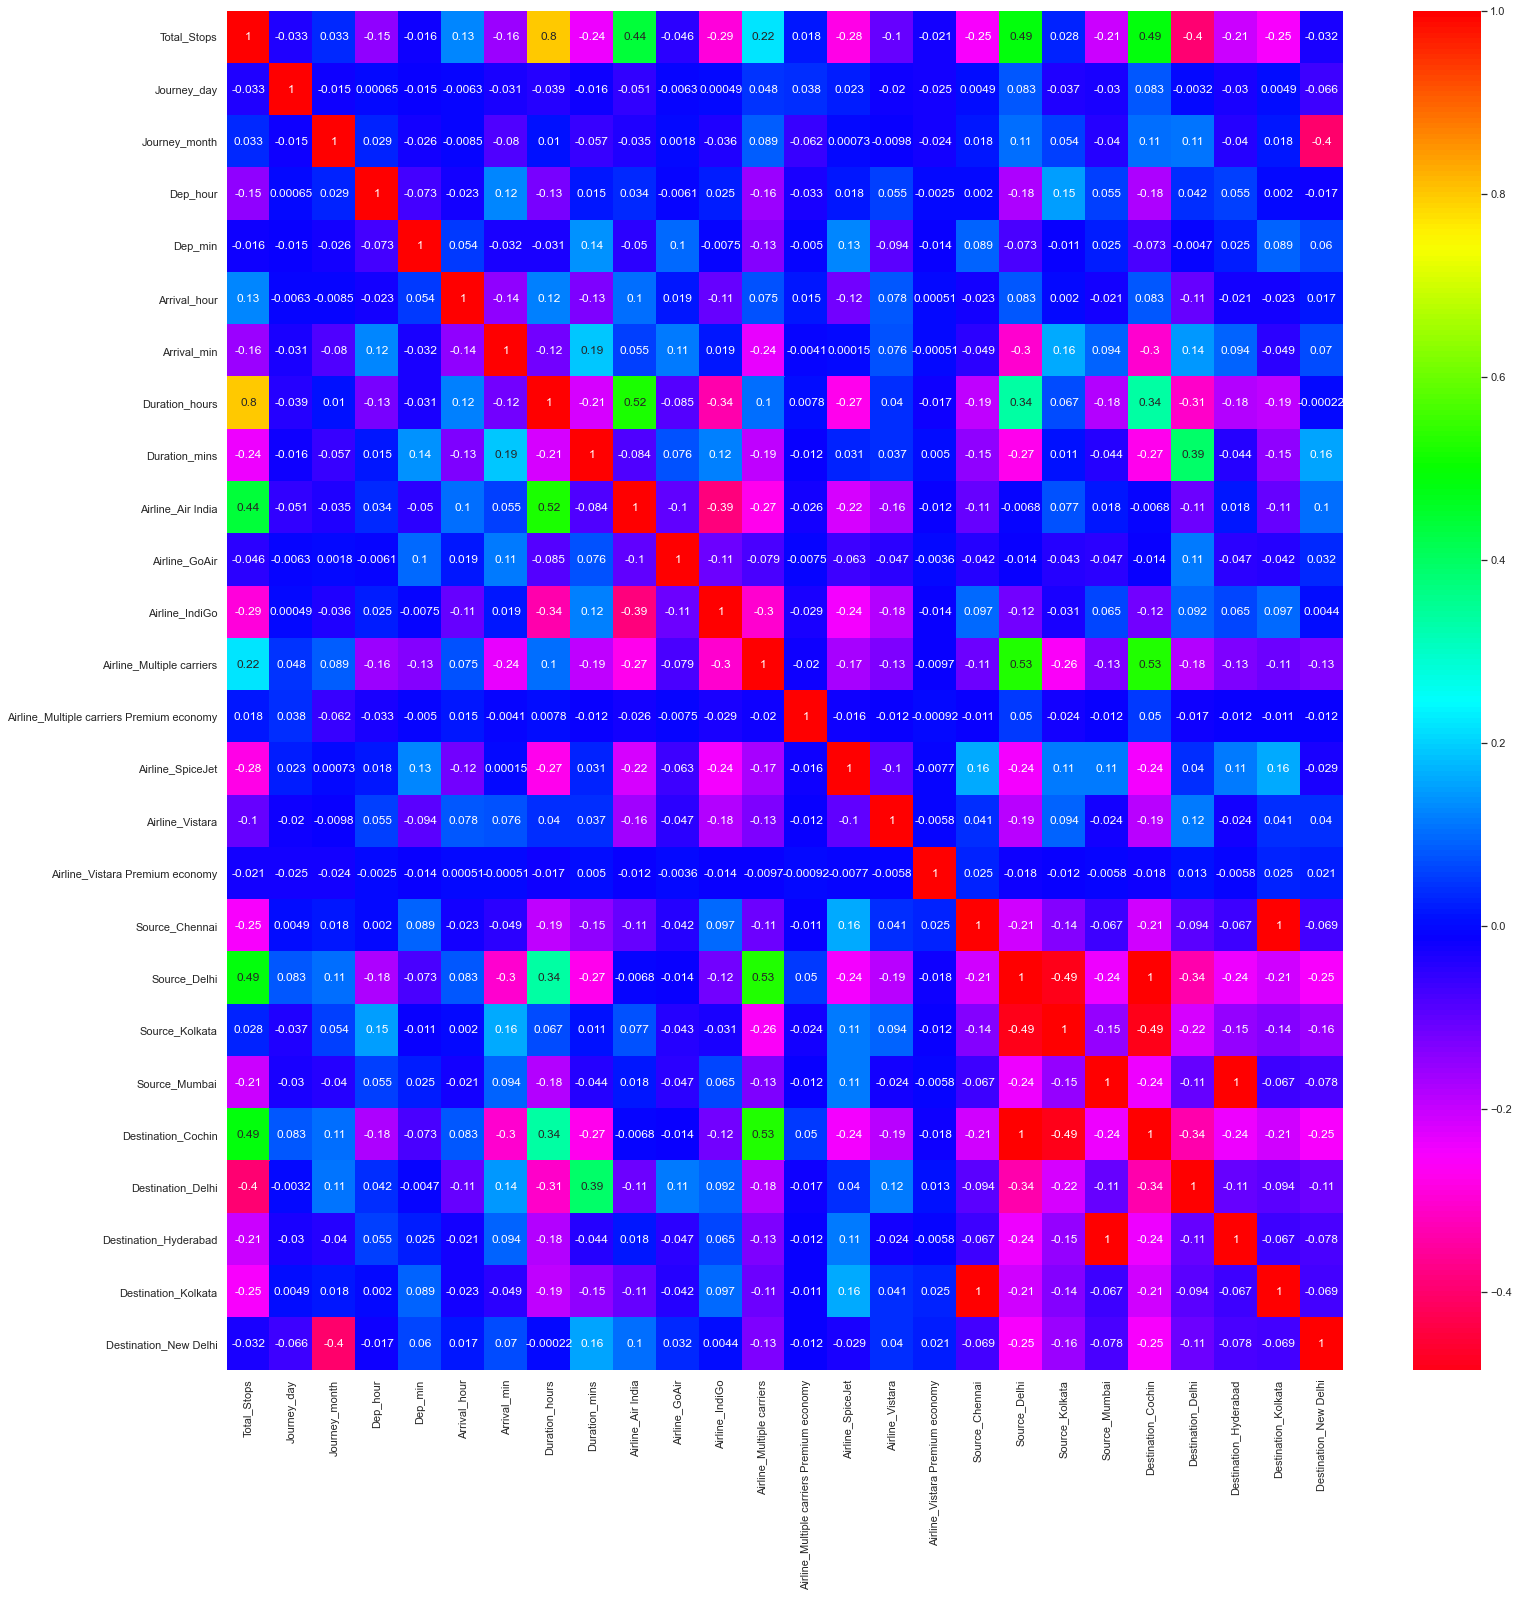

In [51]:
plt.figure(figsize=(25,25))
sns.heatmap(X.corr(), annot=True, cmap = "hsv_r")

### Important feature using ExtraTreesRegressor

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

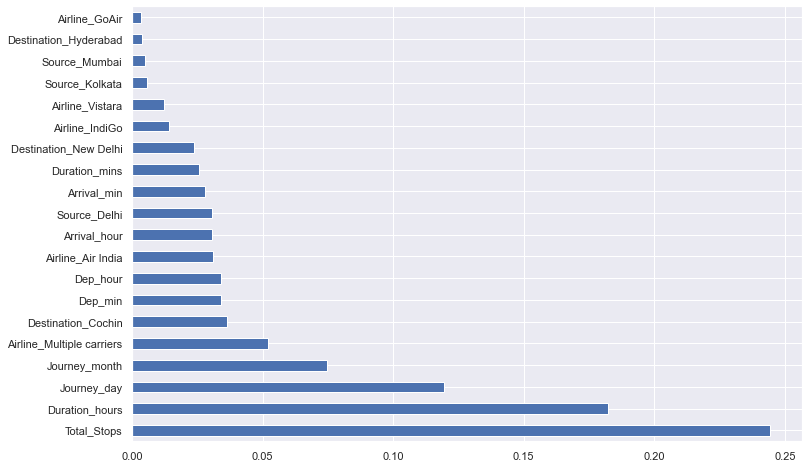

In [53]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Feture Scalling

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
test_data = sc.transform(test_data)

### Select the algorithm 

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [56]:
names = ["LinearRegression", "RandomForestRegressor","DecisionTreeRegressor","Linear_SVM"]

regressors = [
                LinearRegression(),
                RandomForestRegressor(n_estimators = 10, random_state = 0),
                DecisionTreeRegressor(random_state = 0),
                SVR(kernel="linear", C=0.025)
]

In [57]:
scores = []
for name, reg in zip(names, regressors):
    reg.fit(X, y)
    score = reg.score(X, y)
    scores.append(score)

In [58]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores


In [59]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,LinearRegression,0.619979
1,RandomForestRegressor,0.960909
2,DecisionTreeRegressor,0.987778
3,Linear_SVM,0.068728


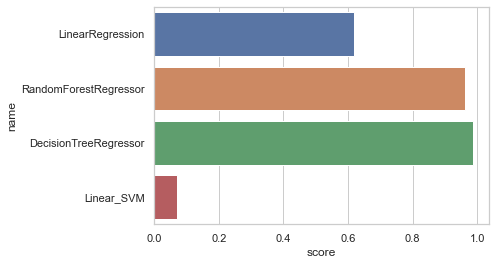

In [60]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

### Apply the DecisionTreeRegressor algotithm

In [61]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [62]:
y_pred = regressor.predict(test_data)

In [63]:
regressor.score(X, y)

0.9877778936142323

### Import pickle

In [65]:
import pickle
pkl_file = open("fl8ight_price.pkl",'wb')
pickle.dump(regressor,pkl_file)
pkl_file.close()